No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


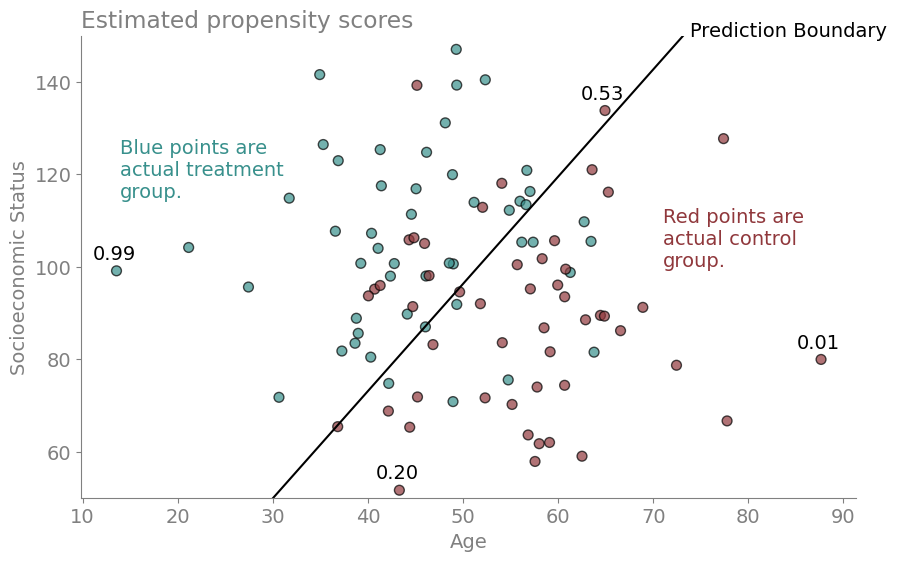

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 14})  
from textwrap import wrap

# Setting the seed for reproducibility
np.random.seed(42)

# Generating synthetic data for two groups: Medically Adherent (1) and Non-Adherent (0)
SES_adherent = np.random.normal(110, 20, 50)  # Higher average SES
Age_adherent = np.random.normal(45, 12, 50)   # Slightly younger
SES_non_adherent = np.random.normal(90, 20, 50)  # Lower average SES
Age_non_adherent = np.random.normal(55, 12, 50)  # Slightly older

# Stack the arrays for adherent and non-adherent groups, flipping Age and SES
Age = np.concatenate((Age_adherent, Age_non_adherent))
SES = np.concatenate((SES_adherent, SES_non_adherent))
X = np.vstack((Age, SES)).T
treatment = np.array([1]*50 + [0]*50)  # 1 for adherent, 0 for non-adherent

# Fit a logistic regression to estimate propensity scores based on Age and SES
model = LogisticRegression()
model.fit(X, treatment)
coef = model.coef_[0]
intercept = model.intercept_

# Color map for plotting
cmap = ListedColormap([control_color, treatment_color]) 

# Creating a scatter plot of the data points
plt.figure(figsize=(10, 6))
ax = plt.gca()
beautify_ax(ax, 'gray')
plt.scatter(X[:, 0], X[:, 1], c=treatment, cmap=cmap, edgecolor='k', s=50, alpha=0.7)

# Plot the decision boundary
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200)
y_values = -(x_values * coef[0] + intercept) / coef[1]
plt.plot(x_values, y_values, label="Decision Boundary", color="black")

# Predict propensity scores for all points
propensity_scores = model.predict_proba(X)[:, 1]

# Define target propensity scores and annotate the closest points
target_scores = [0.0, 0.2, 0.5, 0.6, 0.8, 1.0]
indices = [np.argmin(np.abs(propensity_scores - score)) for score in target_scores]
indices = [79, 60, 75, 24]
# Annotate these points on the plot
for idx in indices:
    plt.text(X[idx, 0]+2, X[idx, 1]+2.5, f"{propensity_scores[idx]:.2f}",  ha='right', color='black')
plt.text(x_values[-38], y_values[-41], 'Prediction Boundary', color='black', va='bottom')
# Add text labels for scatter plots
# plt.text(20, 120, r'Red points are actual control group', color=control_color)

# Define a long string
description1 = "Red points are actual control group."

# Wrap this text with a certain width.
wrapped_text1 = '\n'.join(wrap(description1, width=20))
# Use plt.text to place wrapped text
plt.text(0.75, 0.5, wrapped_text1, transform=plt.gca().transAxes,  bbox=dict(boxstyle="round", alpha=0.0),
         color=control_color)

description2 = "Blue points are actual treatment group."
# Wrap this text with a certain width.
wrapped_text2 = '\n'.join(wrap(description2, width=20))
# Use plt.text to place wrapped text
plt.text(0.05, 0.65, wrapped_text2, transform=plt.gca().transAxes,  bbox=dict(boxstyle="round", alpha=0.0),
         color=treatment_color)
plt.xlabel('Age')
plt.ylabel('Socioeconomic Status')
plt.title('Estimated propensity scores', loc='left', color='gray')
plt.ylim(50, 150)
# plt.legend()
plt.savefig("propensity_scores.pdf")
plt.show()